https://shapely.readthedocs.io/en/stable/  
Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library.(https://libgeos.org/)
GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS.
* Shapely does not support coordinate system transformations.
* Shapely is a planar geometry library and z, the height above or below the plane, is ignored in geometric analysis. 

refer to: https://www.cnblogs.com/giserliu/p/4993697.html  
https://blog.csdn.net/linzi1994/article/details/106484538


https://web.archive.org/web/20160719195511/http://www.vividsolutions.com/jts/discussion.htm

In [ ]:
# conda install shapely --channel conda-forge

# object
## Point

In [86]:
from shapely.geometry import Point

### 构造

In [87]:
Point(0.0, 0.0) == Point((0.0, 0.0)) == Point(0, 0) == Point((0, 0)) 

True

In [88]:
point = Point(0.0, 0.0)

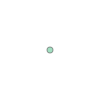

In [89]:
point

In [95]:
print(point)

POINT (0 0)


In [85]:
print(point.geom_type)
print("area =", point.area)
print("length =", point.length)
print("(min_x, min_y, max_x, max_y) =", point.bounds)

Point
area = 0.0
length = 0.0
(min_x, min_y, max_x, max_y) = (0.0, 0.0, 0.0, 0.0)


### 坐标

In [90]:
list(point.coords)

[(0.0, 0.0)]

In [91]:
point.coords[:]

[(0.0, 0.0)]

In [92]:
print("x =", point.x, ", y =", point.y)

x = 0.0 , y = 0.0


### buffer

In [97]:
patch = Point(0.0, 0.0).buffer(10.0)

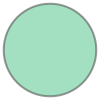

In [98]:
patch

In [99]:
donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))

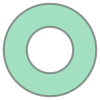

In [102]:
donut

In [100]:
print(donut.centroid)

POINT (0 0)


In [101]:
print(donut.representative_point())

POINT (1.4975923633360986 0.0490085701647802)


## LineString

In [61]:
from shapely.geometry import LineString

### 构造

In [132]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

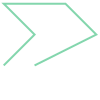

In [133]:
line

In [134]:
print(line.geom_type)
print("area =", line.area)
print("length =", line.length)
print("(min_x, min_y, max_x, max_y) =", line.bounds)

LineString
area = 0.0
length = 8.478708664619074
(min_x, min_y, max_x, max_y) = (0.0, 0.0, 3.0, 2.0)


### 坐标

In [135]:
list(line.coords)

[(0.0, 0.0), (1.0, 1.0), (0.0, 2.0), (2.0, 2.0), (3.0, 1.0), (1.0, 0.0)]

In [136]:
line.coords[:]

[(0.0, 0.0), (1.0, 1.0), (0.0, 2.0), (2.0, 2.0), (3.0, 1.0), (1.0, 0.0)]

In [137]:
line.coords[1:]

[(1.0, 1.0), (0.0, 2.0), (2.0, 2.0), (3.0, 1.0), (1.0, 0.0)]

## LinearRing
* 有序序列中的重复点是允许的，但可能会导致性能损失，因此应避免
* LinearRing 不能与自身交叉，也不能在单个点上接触自身

In [138]:
from shapely.geometry import LinearRing

### 构造

In [139]:
ring = LinearRing([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 0.8), (0, 0)])

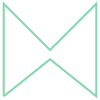

In [140]:
ring

In [141]:
print(ring.geom_type)
print("area =", ring.area)
print("length =", ring.length)
print("(min_x, min_y, max_x, max_y) =", ring.bounds)

LinearRing
area = 0.0
length = 9.389676819719329
(min_x, min_y, max_x, max_y) = (0.0, 0.0, 2.0, 2.0)


### 坐标

In [142]:
list(ring.coords)

[(0.0, 0.0),
 (0.0, 2.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (2.0, 0.0),
 (1.0, 0.8),
 (0.0, 0.0)]

## Polygon
有效多边形的环不能相互交叉，但只能在一个点上接触

In [ ]:
from shapely.geometry import Polygon

### 构造

In [180]:
ring = LinearRing([(0, 0), (1, 1), (1, 0)])

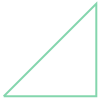

In [181]:
ring

In [182]:
# case 1
polygon = Polygon(ring)

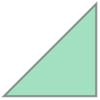

In [183]:
polygon

In [184]:
Polygon([(0, 0), (1, 1), (1, 0)]) == Polygon(ring)

True

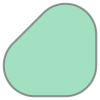

In [185]:
# case 2
Polygon(polygon).buffer(1.0)

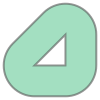

In [186]:
# case 3
Polygon(polygon.buffer(1.0).exterior, [ring])

In [156]:
# case 4
exter = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
inter = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)]
polygon = Polygon(exter, [inter])

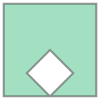

In [157]:
polygon

In [158]:
print(polygon.geom_type)
print("area =", polygon.area)
print("length =", polygon.length)
print("(min_x, min_y, max_x, max_y) =", polygon.bounds)

Polygon
area = 3.5
length = 10.82842712474619
(min_x, min_y, max_x, max_y) = (0.0, 0.0, 2.0, 2.0)


### 坐标

In [159]:
list(polygon.exterior.coords)

[(0.0, 0.0), (0.0, 2.0), (2.0, 2.0), (2.0, 0.0), (0.0, 0.0)]

In [163]:
list(polygon.interiors)

In [168]:
interior = polygon.interiors[0]

In [169]:
list(interior.coords)

[(1.0, 0.0), (0.5, 0.5), (1.0, 1.0), (1.5, 0.5), (1.0, 0.0)]

### 距离

In [146]:
polygon.distance(Point(3,1))

1.0

In [147]:
Point(3,1).hausdorff_distance(polygon)

3.1622776601683795

In [148]:
polygon.hausdorff_distance(Point(3,1))

3.1622776601683795

In [67]:
max(Point(2,1).hausdorff_distance(Point(0,0)),
    Point(2,1).hausdorff_distance(Point(1,0)),
    Point(2,1).hausdorff_distance(Point(1,2)),
    Point(2,1).hausdorff_distance(Point(0,1)))

2.23606797749979

In [69]:
print(polygon.representative_point()) # a cheaply computed point

POINT (0.75 1.5)


In [72]:
print(polygon.centroid) # centroid(质心)

POINT (0.5555555555555556 0.7777777777777778)


In [41]:
polygon.minimum_clearance

1.0

minimum_clearance: the smallest distance by which a node could be moved to produce an invalid geometry.  
This can be thought of as a measure of the robustness of a geometry, where larger values of minimum clearance indicate a more robust geometry. If no minimum clearance exists for a geometry, such as a point, this will return math.infinity.

## box
默认情况下按逆时针顺序排列

In [194]:
from shapely.geometry import box

In [195]:
block = box(0.0, 0.0, 1.0, 1.0)

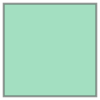

In [196]:
block

In [197]:
list(block.exterior.coords)

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

In [202]:
polygon = Polygon([(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)])

### shapely.geometry.polygon.orient()
具有已知方向的多边形

In [206]:
import shapely
polygon = Polygon([(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)])
list(shapely.geometry.polygon.orient(polygon, sign=1.0).exterior.coords) # 逆时针

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

In [208]:
list(shapely.geometry.polygon.orient(polygon, sign=-1.0).exterior.coords) # 顺时针

[(1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)]

## MultiPoint

In [221]:
from shapely.geometry import MultiPoint

### 构造

In [225]:
MultiPoint([(0.0, 0.0), (1.0, 1.0)]) == MultiPoint([Point(0.0, 0.0), Point(1.0, 1.0)])

True

In [222]:
points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])

In [223]:
print(points.geom_type)
print("area =", points.area)
print("length =", points.length)
print("(min_x, min_y, max_x, max_y) =", points.bounds)

MultiPoint
area = 0.0
length = 0.0
(min_x, min_y, max_x, max_y) = (0.0, 0.0, 1.0, 1.0)


### 元素

In [224]:
list(points.geoms)

## MultiLineString

In [231]:
from shapely.geometry import MultiLineString

### 构建

In [237]:
MultiLineString([((0, 0), (1, 1)), ((-1, 0), (1, 0))]) == MultiLineString([LineString([(0, 0), (1, 1)]), LineString([(-1, 0), (1, 0)])])

True

In [232]:
lines = MultiLineString([((0, 0), (1, 1)), ((-1, 0), (1, 0))])

In [233]:
print(lines.geom_type)
print("area =", lines.area)
print("length =", lines.length)
print("(min_x, min_y, max_x, max_y) =", lines.bounds)

MultiLineString
area = 0.0
length = 3.414213562373095
(min_x, min_y, max_x, max_y) = (-1.0, 0.0, 1.0, 1.0)


### 元素

In [235]:
list(lines.geoms)

## MultiPolygon

In [ ]:
from shapely.geometry import MultiPolygon

### 构造

# Collections

In [212]:
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
x = a.intersection(b)

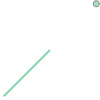

In [214]:
x

In [218]:
list(x.geoms)

# 判断点在多边形内
https://www.jianshu.com/p/7c995b711d7b  
**<font color="red">geopandas 读取 shp</font>** 待研究

In [29]:
from shapely.geometry import Point
from shapely.geometry import Polygon
polygon = Polygon([(0,0), (0,2), (2,2), (2,0)])

In [30]:
polygon.intersects(Point(0,0))

True

In [31]:
Point(0,0).within(polygon)

False

In [32]:
polygon.intersects(Point(1,1))

True

In [33]:
Point(1,1).within(polygon)

True

In [34]:
polygon.intersects(Point(-1,-1))

False

In [35]:
Point(-1,-1).within(polygon)

False